# Número de Candidatas do gênero Feminino versus a Taxa de Feminicídio no Brasil, dos anos de 2004 à 2020
### Será realizado um comparativo do número de candidatas mulheres, para os cargos de Presidentas, Deputadas Federal e Estadual, Senadoras, Prefeitas (tanto nos cargos titulares, quanto vice) e também Vereadoras, versus a taxa de Feminicído disponibilizado pelo IPEA (Instituto de Pesquisas Econômicas Aplicadas).

In [1]:
#importa módulos
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

- Seleção dos dados:
    * Os dados dos candidatos foram extraídos do site: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais
    
    
- Pré-processamento:
    * Os dados dos anos de 2004 a 2012, estavam separados por estado e em arquivo .txt. Foi necessário concatenar os arquivos, formando um dataset anual. Esse processo está detalhado nos notebooks dos respectivos anos.
    * No notebook "total.ipnyb", todos os datasets anuais foram concatenados e salvo em um único dataset com as informações necessárias dos anos de 2004 à 2020.

In [2]:
#leitura do database
df = pd.read_csv(r'consulta_cand_2004_2020_BRASIL.csv', delimiter=',', encoding='utf_8') 

In [3]:
#Verifica o número de linhas e colunas do dataset
df.shape

(2407292, 11)

In [4]:
#Verifica o tipo de dado do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407292 entries, 0 to 2407291
Data columns (total 11 columns):
ANO_ELEICAO                 int64
CD_TIPO_ELEICAO             int64
NM_TIPO_ELEICAO             object
SG_UF                       object
NM_UE                       object
DS_CARGO                    object
DS_DETALHE_SITUACAO_CAND    object
SG_PARTIDO                  object
DS_GENERO                   object
DS_GRAU_INSTRUCAO           object
DS_SIT_TOT_TURNO            object
dtypes: int64(2), object(9)
memory usage: 202.0+ MB


In [5]:
#Verifica se todos os anos foram concatenados corretamente
df['ANO_ELEICAO'].unique()

array([2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])

In [6]:
#Verifica os cargos existentes no dataset.
df['DS_CARGO'].unique()

array(['PREFEITO', 'VICE-PREFEITO', 'VEREADOR', 'GOVERNADOR',
       'VICE-GOVERNADOR', 'SENADOR', 'DEPUTADO FEDERAL',
       'DEPUTADO ESTADUAL', '1º SUPLENTE SENADOR', '2º SUPLENTE SENADOR',
       'PRESIDENTE', 'VICE-PRESIDENTE',
       'VOCÊ É A FAVOR | DA CRIAÇÃO DO MUNICÍPIO DE | EXTREMA DE RONDÔNIA?',
       'VOCÊ É A FAVOR DA | ALTERAÇÃO DO NOME | DA CIDADE DE EMBU" | PARA "EMBU DAS ARTES"?"',
       'DEPUTADO DISTRITAL', '1º SUPLENTE', '2º SUPLENTE'], dtype=object)

In [7]:
#Verifica os tipos de gênero descritos no dataset
df['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO', 'NÃO INFORMADO', '6', '8',
       'NÃO DIVULGÁVEL'], dtype=object)

In [8]:
# Verifica se há algum dado faltante (Como só havia 3 dados faltantes apenas,
# não foi realizado nada para preencher)
df.isnull().sum()

ANO_ELEICAO                 0
CD_TIPO_ELEICAO             0
NM_TIPO_ELEICAO             0
SG_UF                       0
NM_UE                       0
DS_CARGO                    0
DS_DETALHE_SITUACAO_CAND    0
SG_PARTIDO                  0
DS_GENERO                   0
DS_GRAU_INSTRUCAO           0
DS_SIT_TOT_TURNO            3
dtype: int64

In [9]:
#Verifica as 5 primeiras linhas do dataset
df.head()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_SIT_TOT_TURNO
0,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PTB,MASCULINO,FUNDAMENTAL INCOMPLETO,NÃO ELEITO
1,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PT,MASCULINO,FUNDAMENTAL COMPLETO,NÃO ELEITO
2,2004,1,ELEICOES 2004,AC,ACRELANDIA,PREFEITO,DEFERIDO,PSDB,MASCULINO,SUPERIOR COMPLETO,ELEITO
3,2004,1,ELEICOES 2004,AC,ACRELANDIA,VICE-PREFEITO,DEFERIDO,PMDB,MASCULINO,FUNDAMENTAL COMPLETO,#NULO#
4,2004,1,ELEICOES 2004,AC,ACRELANDIA,VICE-PREFEITO,DEFERIDO,PTB,MASCULINO,SUPERIOR COMPLETO,#NULO#


#### Alguns cargos  e gênero eram pontuais e locais, não contribuindo para a amostra de um modo geral, portanto foram excluídos do dataset.

In [10]:
df.drop(df[df['DS_CARGO'] == 'VOCÊ É A FAVOR | DA CRIAÇÃO DO MUNICÍPIO DE | EXTREMA DE RONDÔNIA?'].index, inplace=True)
df.drop(df[df['DS_CARGO'] == 'VOCÊ É A FAVOR DA | ALTERAÇÃO DO NOME | DA CIDADE DE EMBU" | PARA "EMBU DAS ARTES"?"'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == '6'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == '8'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == 'NÃO DIVULGÁVEL'].index, inplace=True)
df.drop(df[df['DS_GENERO'] == 'NÃO INFORMADO'].index, inplace=True)

In [11]:
# Verifica o novo formato da coluna
df['DS_CARGO'].unique()

array(['PREFEITO', 'VICE-PREFEITO', 'VEREADOR', 'GOVERNADOR',
       'VICE-GOVERNADOR', 'SENADOR', 'DEPUTADO FEDERAL',
       'DEPUTADO ESTADUAL', '1º SUPLENTE SENADOR', '2º SUPLENTE SENADOR',
       'PRESIDENTE', 'VICE-PRESIDENTE', 'DEPUTADO DISTRITAL',
       '1º SUPLENTE', '2º SUPLENTE'], dtype=object)

In [12]:
# Verifica o novo formato da coluna
df['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

#### Para ter uma noção geral de como é a proporção do número de candidatas mulheres versus homens:

<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens nas Eleições - Por Cargo'}, xlabel='DS_CARGO'>

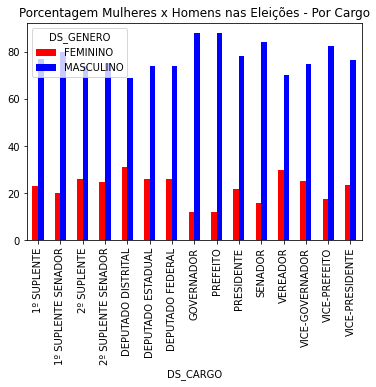

In [13]:
# Cruzamento das colunas Cargo com Gênero
cargo_sexo = pd.crosstab(df['DS_CARGO'],df['DS_GENERO']).apply(lambda r: r/r.sum(), axis=1) * 100
cargo_sexo.plot(kind='bar',width=0.5, color=['red','blue', 'green', 'black', 'purple', 'pink'], title='Porcentagem Mulheres x Homens nas Eleições - Por Cargo')

In [14]:
# Resultado do cruzamento acima
cargo_sexo 

DS_GENERO,FEMININO,MASCULINO
DS_CARGO,,
1º SUPLENTE,22.809917,77.190083
1º SUPLENTE SENADOR,20.000000,80.000000
2º SUPLENTE,26.171244,73.828756
2º SUPLENTE SENADOR,24.910394,75.089606
DEPUTADO DISTRITAL,31.125498,68.874502
DEPUTADO ESTADUAL,26.079038,73.920962
DEPUTADO FEDERAL,26.133621,73.866379
GOVERNADOR,11.990687,88.009313
PREFEITO,12.169083,87.830917


<AxesSubplot:ylabel='DS_GENERO'>

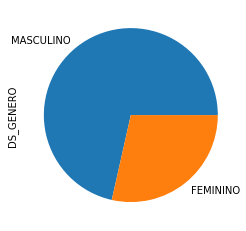

In [15]:
#Gráfico para visualizar a distribuição do gênero.
df['DS_GENERO'].value_counts().plot.pie()

<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens nas Eleições - Por Estado'}, xlabel='SG_UF'>

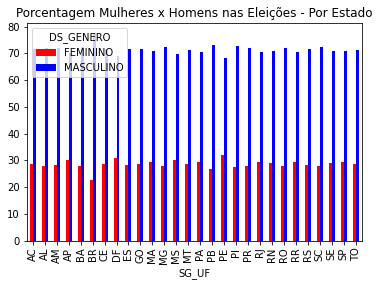

In [16]:
# Cruzamento das colunas dos Estados e do Gênero
estado_sexo = pd.crosstab(df['SG_UF'],df['DS_GENERO']).apply(lambda r: r/r.sum(), axis=1) * 100
estado_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Porcentagem Mulheres x Homens nas Eleições - Por Estado')

In [17]:
# Resultado do cruzamento acima
estado_sexo

DS_GENERO,FEMININO,MASCULINO
SG_UF,,
AC,28.478990,71.521010
AL,27.954987,72.045013
AM,28.180957,71.819043
AP,30.021482,69.978518
BA,27.787674,72.212326
BR,22.549020,77.450980
CE,28.455800,71.544200
DF,30.819140,69.180860
ES,28.303792,71.696208


In [18]:
# Criação de um novo dataframe filtrando apenas os dados das Mulheres, que são vereadoras
# E se foram eleitas ou não

a = pd.DataFrame(df.query('DS_CARGO == "VEREADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
b = pd.DataFrame(df.query('DS_CARGO == "VEREADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [19]:
# Concatena os dataframes criados acima
vereadora_fem = pd.concat([a, b])

In [20]:
# Cruzamento dos dados da Coluna Situação e Estado
vereadora_estado = pd.crosstab(vereadora_fem['DS_SIT_TOT_TURNO'], vereadora_fem['SG_UF']).T

In [21]:
# Top 10 dos Estados que mais tiveram vereadoras eleitas
vereadora_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO
SG_UF,,
MG,1237,10321
PB,1092,1822
SP,963,19227
RS,885,2867
BA,765,4647
PR,646,3942
MA,499,2131
SC,460,1602
CE,452,1675


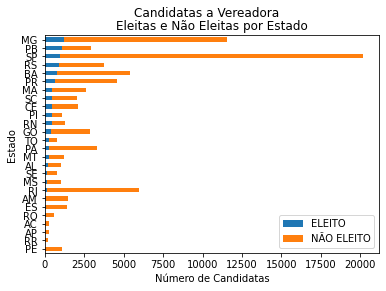

In [22]:
#Plota os dados por Estados que mais tiveram vereadores eleitas
vereadora_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Vereadora")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [23]:
# Criação de um novo dataframe agora com os dados de Prefeita e Vice-Prefeita
c = pd.DataFrame(df.query('DS_CARGO == "PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
d = pd.DataFrame(df.query('DS_CARGO == "PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

e = pd.DataFrame(df.query('DS_CARGO == "VICE-PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
f = pd.DataFrame(df.query('DS_CARGO == "VICE-PREFEITO" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [24]:
# Concatena os dataframes criados acima
prefeita_fem = pd.concat([c, d, e, f])

In [25]:
# Cruzamento das colunas situação e estado
prefeita_estado = pd.crosstab(prefeita_fem['DS_SIT_TOT_TURNO'], prefeita_fem['SG_UF']).T

In [26]:
# Top 10 dos Estados que mais elegeram Prefeitas e Vice-Prefeitas
prefeita_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO
SG_UF,,
SP,437,1322
MG,406,1012
PB,386,599
BA,337,685
RN,235,316
MA,234,545
PR,228,519
RS,202,535
CE,190,344


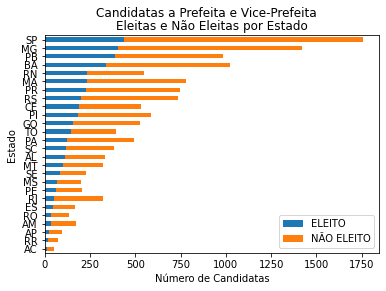

In [27]:
# Plota o gráfico em ordem de Estados que mais elegeram Prefeitas
prefeita_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Prefeita e Vice-Prefeita")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

### O mesmo procedimento realizado no processo de Vereadoras e Prefeitas, foram realizados para os cargos de Governadora, Deputada Estadual, Deputada Federal e Senadora.

In [28]:
g = pd.DataFrame(df.query('DS_CARGO == "GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
h = pd.DataFrame(df.query('DS_CARGO == "GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

i = pd.DataFrame(df.query('DS_CARGO == "VICE-GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
j = pd.DataFrame(df.query('DS_CARGO == "VICE-GOVERNADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [29]:
# Concatena os dataframes criados acima
governadora_fem = pd.concat([g, h, i, j])

In [30]:
governadora_estado = pd.crosstab(governadora_fem['DS_SIT_TOT_TURNO'], governadora_fem['SG_UF']).T

In [31]:
governadora_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO
SG_UF,,
RN,3,4
CE,2,6
PB,2,8
PI,2,11
AC,1,3
ES,1,7
MA,1,7
MS,1,6
PA,1,5


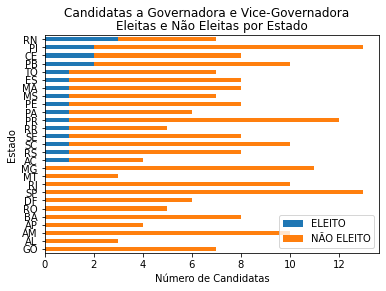

In [32]:
governadora_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Governadora e Vice-Governadora")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [33]:
k = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO ESTADUAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
l = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO ESTADUAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [34]:
# Concatena os dataframes criados acima
dep_estadual_fem = pd.concat([k, l])

In [35]:
dep_estadual_estado = pd.crosstab(dep_estadual_fem['DS_SIT_TOT_TURNO'],dep_estadual_fem['SG_UF']).T

In [36]:
dep_estadual_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO
SG_UF,,
PB,20,54
RJ,19,210
BA,18,83
SP,18,296
MA,13,57
RS,12,112
MG,11,67
PA,11,92
PI,10,53


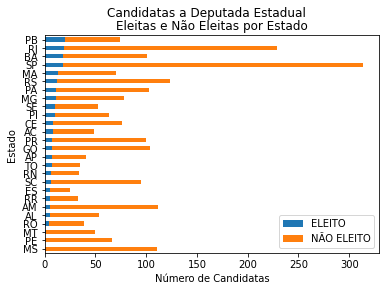

In [37]:
dep_estadual_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Deputada Estadual")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [38]:
m = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO FEDERAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
n = pd.DataFrame(df.query('DS_CARGO == "DEPUTADO FEDERAL" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [39]:
# Concatena os dataframes criados acima
dep_federal_fem = pd.concat([m, n])

In [40]:
dep_federal_estado = pd.crosstab(dep_federal_fem['DS_SIT_TOT_TURNO'],dep_federal_fem['SG_UF']).T

In [41]:
dep_federal_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO
SG_UF,,
RJ,9,175
SP,9,373
AP,7,20
ES,6,44
BA,5,100
RS,5,76
GO,4,44
AC,3,15
MG,3,78


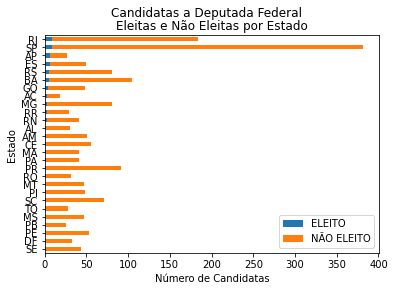

In [42]:
dep_federal_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Deputada Federal")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [43]:
o = pd.DataFrame(df.query('DS_CARGO == "SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
p = pd.DataFrame(df.query('DS_CARGO == "SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

q = pd.DataFrame(df.query('DS_CARGO == "1º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
r = pd.DataFrame(df.query('DS_CARGO == "1º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

s = pd.DataFrame(df.query('DS_CARGO == "2º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
t = pd.DataFrame(df.query('DS_CARGO == "2º SUPLENTE SENADOR" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [44]:
# Concatena os dataframes criados acima
senadora_fem = pd.concat([o, p, q, r, s, t])

In [45]:
senadora_estado = pd.crosstab(senadora_fem['DS_SIT_TOT_TURNO'],senadora_fem['SG_UF']).T

In [46]:
senadora_estado.nlargest(10,["ELEITO"])

DS_SIT_TOT_TURNO,ELEITO,NÃO ELEITO
SG_UF,,
MS,3,1
RN,3,7
SE,2,2
SP,2,11
TO,2,1
AM,1,3
BA,1,2
DF,1,2
ES,1,3


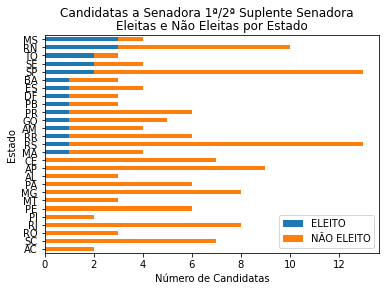

In [47]:
senadora_estado.sort_values('ELEITO', ascending=True)[['ELEITO','NÃO ELEITO']].plot.barh(stacked=True, rot=0)
plt.suptitle("Candidatas a Senadora 1ª/2ª Suplente Senadora")
plt.title("Eleitas e Não Eleitas por Estado")
plt.xlabel('Número de Candidatas');
plt.ylabel('Estado');
plt.legend();

In [48]:
# Cria um novo dataframe agora com o filtro para o Cargo de Presidenta e Vice-Presidenta
u = pd.DataFrame(df.query('DS_CARGO == "PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
v = pd.DataFrame(df.query('DS_CARGO == "PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

x = pd.DataFrame(df.query('DS_CARGO == "VICE-PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "ELEITO"'))
z = pd.DataFrame(df.query('DS_CARGO == "VICE-PRESIDENTE" and DS_GENERO == "FEMININO" and DS_SIT_TOT_TURNO  == "NÃO ELEITO"'))

In [49]:
# Concatena os dataframes criados acima
presidenta_fem = pd.concat([u, v, x, z])

In [50]:
# Cruza os dados da situação por Ano
presidenta_estado = pd.crosstab(presidenta_fem['DS_SIT_TOT_TURNO'],presidenta_fem['ANO_ELEICAO']).T

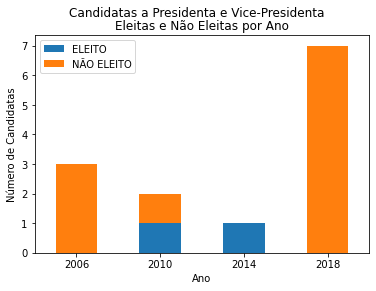

In [51]:
# Plota o Gráfico de Candidatas Eleitas e Não Eleitas por ano
presidenta_estado.plot.bar(stacked=True, rot=0)
plt.suptitle("Candidatas a Presidenta e Vice-Presidenta")
plt.title("Eleitas e Não Eleitas por Ano")
plt.xlabel('Ano');
plt.ylabel('Número de Candidatas');
plt.legend();

## Para o início das Análises e cruzamento com os dados de Feminicídio, foi criado esse novo dataframe

In [52]:
#Criação de um novo dataframe filtrando apenas os dados das Mulheres
feminino = df[df['DS_GENERO'] == 'FEMININO']

In [53]:
# Confere as colunas contidas no dataframe 
feminino.columns

Index(['ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'SG_UF', 'NM_UE',
       'DS_CARGO', 'DS_DETALHE_SITUACAO_CAND', 'SG_PARTIDO', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [54]:
# Cruzamento dos dados das Eleitas, por Ano e por Estado.
# Para ter uma noção geral do números de mulheres Eleitas ao longo dos anos.

candidata_eleitas = pd.DataFrame(feminino.query('DS_SIT_TOT_TURNO == "ELEITO"'))
candidata_eleitas = pd.crosstab(candidata_eleitas['ANO_ELEICAO'],candidata_eleitas['SG_UF']).T
candidata_eleitas.head(28)

ANO_ELEICAO,2004,2006,2008,2010,2012,2014,2016,2018
SG_UF,,,,,,,,
AC,21,6,23,5,3,2,6,2
AL,125,3,149,4,40,1,37,2
AM,58,4,50,4,14,0,11,2
AP,19,6,23,8,10,0,7,1
BA,421,11,429,13,137,1,115,2
BR,0,0,0,1,0,1,0,0
CE,234,3,260,7,77,1,71,1
DF,0,0,0,0,0,0,0,3
ES,44,6,58,5,19,1,12,3


In [55]:
# Verifica os Partidos das Candidatas
feminino['SG_PARTIDO'].unique()

array(['PSDB', 'PMDB', 'PDT', 'PC do B', 'PT', 'PPS', 'PMN', 'PFL', 'PSB',
       'PL', 'PV', 'PSDC', 'PTB', 'PP', 'PSL', 'PRTB', 'PT do B', 'PRP',
       'PTN', 'PRONA', 'PTC', 'PAN', 'PHS', 'PSC', 'PSTU', 'PCO', 'PCB',
       'PSOL', 'PRB', 'PR', 'DEM', 'PSD', 'PPL', 'SD', 'PEN', 'PROS',
       'PMB', 'REDE', 'PATRI', 'NOVO', 'DC', 'MDB', 'AVANTE', 'PODE',
       'SOLIDARIEDADE', 'PATRIOTA', 'REPUBLICANOS', 'CIDADANIA', 'UP'],
      dtype=object)

### De acordo com o congresso em foco, segue a distribuição dos partidos conforme a orientação ideológica, sendo as variáveis:
direita (extrema direita, direita, centro-direita) e esquerda (extrema esquerda, esquerda, centro-esquerda).

https://congressoemfoco.uol.com.br/legislativo/direita-cresce-e-engole-o-centro-no-congresso-mais-fragmentado-da-historia/

In [56]:
# Cria as variáveis com a lista de partidos.

centro = ['AVANTE', 'MDB', 'PMDB', 'PHS', 'PROS', 'PSDB', 'SOLIDARIEDADE', 'PMB']
direita = ['REPUBLICANOS', 'PEN', 'PAN', 'PHS', 'PFL', 'PL', 'PSDC', 'PRONA', 'DC', 'DEM', 'NOVO', 'PATRIOTA', 'PATRI', 'PODE', 'PODEMOS', 'PP', 'PR', 'PRB', 'PRP', 'PRTB', 'PSC', 'PSD', 'PSL', 'PTB', 'PTC', 'PTN']
esquerda = ['PC do B', 'PSTU', 'PSB', 'PDT', 'PSOL', 'PMN', 'PT', 'PPL', 'PV', 'PPS', 'REDE', 'PT do B', 'PCO', 'PCB', 'SD', 'CIDADANIA', 'UP']

In [57]:
# Cria um dicionário
def define_orientacao(x):
    if x in direita:
        return 'DIREITA'
    elif x in centro:
        return 'CENTRO'
    else:
        return 'ESQUERDA'

In [58]:
# Faz uma varredura e cria uma nova coluna setando a orientação ideológica da candidata
feminino['ORIENTACAO'] = feminino.SG_PARTIDO.map(define_orientacao) 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
# Cria um dataset com as informações da orientação das candidatas, por Estado e por ano
orientacao_eleitas_ano = pd.DataFrame(feminino.query('DS_SIT_TOT_TURNO == "ELEITO"'))
fem_group = pd.crosstab(index=[orientacao_eleitas_ano['SG_UF'],orientacao_eleitas_ano['ANO_ELEICAO']], columns=orientacao_eleitas_ano['ORIENTACAO'], margins=True)
fem_group.to_csv('orientacao.csv') 

In [76]:
# Cria um filtro com todos os Estados
fem_estados = pd.DataFrame(feminicidio.query('SG_UF != "BR"'))

# Cria um gráfico de linha para verificar como o número de feminicídios por Estados nos 
# anos de 2006 a 2014 
import plotly.express as px
fig = px.line(fem_estados, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Número de feminicídio nos anos de 2006 a 2014')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## Esse novo dataset foi criado com as informações contidas:
- Do Cruzamento dos dados das Eleitas, por Ano e por Estado e as informações;
- Do Cruzamento da orientação das candidatas, por Estado e por ano;
- Dos Dados do Mapa da Violência obtido do site http://repositorio.ipea.gov.br/handle/11058/7956, página 41.

In [60]:
# Leitura do novo dataset
feminicidio = pd.read_csv(r'feminicidio.csv', delimiter=',', encoding='utf_8')

In [61]:
# Verifica as 5 primeiras linhas do dataset
feminicidio.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
0,2006,AC,15,6,1,1,4
1,2006,AL,106,3,1,0,2
2,2006,AM,13,4,0,3,1
3,2006,AP,53,6,2,1,3
4,2006,BA,243,11,1,4,6


#### Os dados do Mapa da violência são dos anos de 2005 a 2015, foi escolhido as informações apenas dos anos que coincidiram com os anos eleitorais.

In [62]:
feminicidio['ANO'].unique()

array([2006, 2008, 2010, 2012, 2014])

In [63]:
# Importa módulos para gerar gráficos usando o Plotly

# Habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Definindo o renderizador:
import plotly.io as pio
pio.renderers

import plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from itertools import cycle

from plotly.validators.scatter.marker import SymbolValidator

In [64]:
# Criação de um novo dataframe para observar o número de feminicídio ao longo dos anos no Brasil
fem_br = pd.DataFrame(feminicidio.query('SG_UF == "BR"'))

In [65]:
# Criando um gráfico de área
import plotly.express as px
fig = px.line(fem_br, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio ao longo do tempo no Brasil')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [66]:
# Cria um novo dataframe com informações das eleições municipais e federais
eleicao_municipais = pd.DataFrame(feminicidio.query('ANO == "2008" or ANO == "2012"'))
eleicao_federais = pd.DataFrame(feminicidio.query('ANO == "2006" or ANO == "2014"'))

In [67]:
# Gráfico para verificar a distribuição das Orientações nas Eleições Municipais
fig = go.Figure(data=[
    go.Bar(name='Centro', x=eleicao_municipais['ANO'], y=eleicao_municipais['CENTRO']),
    go.Bar(name='Direita', x=eleicao_municipais['ANO'], y=eleicao_municipais['DIREITA']),
    go.Bar(name='Esquerda', x=eleicao_municipais['ANO'], y=eleicao_municipais['ESQUERDA'])
])


fig.update_layout(title_text='Orientações nas Eleições Municipais')
fig.show()

In [68]:
# Gráfico para verificar a distribuição das Orientações nas Eleições Federais
fig = go.Figure(data=[
    go.Bar(name='Centro', x=eleicao_federais['ANO'], y=eleicao_federais['CENTRO']),
    go.Bar(name='Direita', x=eleicao_federais['ANO'], y=eleicao_federais['DIREITA']),
    go.Bar(name='Esquerda', x=eleicao_federais['ANO'], y=eleicao_federais['ESQUERDA'])
])


fig.update_layout(title_text='Orientações nas Eleições Federais')
fig.show()

## Como são muitos Estados e o gráfico acima ficou um pouco confuso, foram criados dataframes para verificar a evolução do feminicídio por Região Geográfica do Brasil

In [69]:
fem_norte = feminicidio[feminicidio['SG_UF'].isin(['AC', 'AM', 'RO', 'RR', 'PA', 'TO'])]
fem_nordeste = feminicidio[feminicidio['SG_UF'].isin(['AL', 'BA', 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE'])]
fem_centro = feminicidio[feminicidio['SG_UF'].isin(['GO', 'MS', 'MT'])]
fem_sudeste = feminicidio[feminicidio['SG_UF'].isin(['ES', 'MG', 'RJ', 'SP'])]
fem_sul = feminicidio[feminicidio['SG_UF'].isin(['PR', 'RS', 'SC'])]

In [70]:
# Criando um gráfico de linha
import plotly.express as px
fig = px.line(fem_norte, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Norte do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [71]:
# Criando um gráfico de linha
import plotly.express as px
fig = px.line(fem_nordeste, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Nordeste do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [72]:
# Criando um gráfico de linha
import plotly.express as px
fig = px.line(fem_centro, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Centro-Oeste do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [73]:
# Criando um gráfico de linha
import plotly.express as px
fig = px.line(fem_sudeste, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Sudeste do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [74]:
# Criando um gráfico de linha
import plotly.express as px
fig = px.line(fem_sul, 
              x="ANO", 
              y="FEMINICIDIO", 
              color='SG_UF', 
              height=500,
              title='Feminicídio na Região Sul do Brasil')

raw_symbols = SymbolValidator().values
# Take only the string values which are in this order.
symbols_names = raw_symbols[::-2]
markers = cycle(symbols_names)

fig.update_traces(mode='lines+markers')
for d in fig.data:
    d.marker.symbol = next(markers)
    d.marker.size = 5


fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [75]:
# Cria um filtro com todos os Estados
fem_estados = pd.DataFrame(feminicidio.query('SG_UF != "BR"'))

### As próximas 6 análises, foram realizadas para verificar se há uma possível relação do número de candidatas eleitas com o número de feminicídio por Estado ou sua Orientação Ideológica.

#### Como os 05 primeiros lugares no Top 10 Estados com o maior número de feminicídio foi o  Estado de SP, um novo dataframe foi realizado para verificar as relações com as candidatas eleitas

In [77]:
# 0s 10 primeiros estados e o ano em que foram registrados o maior número de feminicídio
fem_estados.nlargest(10,["FEMINICIDIO"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
25,2006,SP,788,13,3,3,7
81,2010,SP,678,15,5,1,9
53,2008,SP,667,536,166,187,183
109,2012,SP,640,187,55,75,57
137,2014,SP,612,0,0,0,0
19,2006,RJ,504,15,4,6,5
131,2014,RJ,464,0,0,0,0
97,2012,MT,460,44,7,24,13
60,2010,BA,438,13,1,3,9
88,2012,BA,437,137,21,67,49


In [78]:
# Cria um novo dataframe filtrando o Estado de SP
fem_sampa = pd.DataFrame(feminicidio.query('SG_UF == "SP"'))
fem_sampa.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
25,2006,SP,788,13,3,3,7
53,2008,SP,667,536,166,187,183
81,2010,SP,678,15,5,1,9
109,2012,SP,640,187,55,75,57
137,2014,SP,612,0,0,0,0


In [79]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas Eleitas no Estado de SP',
                                 yaxis={'title':'Número'},
                                 xaxis={'title': 'Período'})

fem_sp = go.Scatter(x=fem_sampa['ANO'], 
                y=fem_sampa['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de SP',
                        line = dict(color = '#17BECF'))

cand_sp = go.Scatter(x=fem_sampa['ANO'], 
                        y=fem_sampa['CANDIDATAS_ELEITAS'],                    
                        name = 'Candidatas Eleitas no Estado de SP',
                        line = dict(color = '#7F7F7F'))

data = [fem_sp, cand_sp]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Como Primeiro  lugar no Top 10 Estados com o menor número de feminicídio foi o  Estado de Roraima, um novo dataframe foi realizado para verificar as relações com as candidatas eleitas

In [80]:
# 0s 10 primeiros estados e o ano em que foram registrados o menor número de feminicídio
fem_estados.nsmallest(10,["FEMINICIDIO"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
79,2010,RR,11,4,2,1,1
2,2006,AM,13,4,0,3,1
23,2006,RR,13,5,2,2,1
28,2008,AC,13,23,5,4,14
30,2008,AM,13,50,10,30,10
0,2006,AC,15,6,1,1,4
51,2008,RR,15,12,3,6,3
58,2010,AM,16,4,0,3,1
84,2012,AC,16,3,0,3,0
86,2012,AM,17,14,3,9,2


In [81]:
# Cria um novo dataframe com as informaçoes apenas do Estado de Roraima
fem_roraima = pd.DataFrame(feminicidio.query('SG_UF == "RR"'))
fem_roraima.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
23,2006,RR,13,5,2,2,1
51,2008,RR,15,12,3,6,3
79,2010,RR,11,4,2,1,1
107,2012,RR,17,6,3,1,2
135,2014,RR,24,1,0,1,0


In [82]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas Eleitas no Estado de RR',
                                 yaxis={'title':'Número'},
                                 xaxis={'title': 'Período'})

fem_rr = go.Scatter(x=fem_roraima['ANO'], 
                y=fem_roraima['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de RR',
                        line = dict(color = '#17BECF'))

cand_rr = go.Scatter(x=fem_roraima['ANO'], 
                        y=fem_roraima['CANDIDATAS_ELEITAS'],                    
                        name = 'Candidatas Eleitas no Estado de RR',
                        line = dict(color = '#7F7F7F'))

data = [fem_rr, cand_rr]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Como Primeiro  lugar no Top 10 Estados com o maior número de Candidatas Eleita foi o  Estado de Minas Gerais, um novo dataframe foi realizado para verificar as relações com o feminicídio no Estado.

In [83]:
# 0s 10 primeiros estados e o ano em que Candidatas foram eleitas.
fem_estados.nlargest(10,["CANDIDATAS_ELEITAS"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
39,2008,MG,86,675,204,300,171
43,2008,PB,87,604,240,274,90
53,2008,SP,667,536,166,187,183
49,2008,RS,219,475,138,190,147
32,2008,BA,315,429,79,213,137
46,2008,PR,38,364,132,137,95
38,2008,MA,81,281,63,109,109
45,2008,PI,298,261,60,111,90
34,2008,CE,117,260,88,92,80
48,2008,RN,59,257,57,107,93


In [84]:
fem_minas = pd.DataFrame(feminicidio.query('SG_UF == "MG"'))
fem_minas.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
11,2006,MG,70,9,2,0,7
39,2008,MG,86,675,204,300,171
67,2010,MG,80,5,0,0,5
95,2012,MG,100,152,46,54,52
123,2014,MG,111,0,0,0,0


In [85]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas Eleitas no Estado de MG',
                                 yaxis={'title':'Número'},
                                 xaxis={'title': 'Período'})

fem_mg = go.Scatter(x=fem_minas['ANO'], 
                y=fem_minas['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de MG',
                        line = dict(color = '#17BECF'))

cand_mg = go.Scatter(x=fem_minas['ANO'], 
                        y=fem_minas['CANDIDATAS_ELEITAS'],                    
                        name = 'Candidatas Eleitas no Estado de MG',
                        line = dict(color = '#7F7F7F'))

data = [fem_mg, cand_mg]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Como Primeiro  lugar no Top 10 Estados com o maior número de Candidatas de Centro foi o  Estado da Paraíba, um novo dataframe foi realizado para verificar as relações com o feminicídio no Estado.

In [86]:
# 0s 10 primeiros estados que mais elegeram mulheres de orientação à Direita
fem_estados.nlargest(10,["CENTRO"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
43,2008,PB,87,604,240,274,90
39,2008,MG,86,675,204,300,171
53,2008,SP,667,536,166,187,183
49,2008,RS,219,475,138,190,147
46,2008,PR,38,364,132,137,95
52,2008,SC,86,237,110,94,33
37,2008,GO,160,224,102,95,27
34,2008,CE,117,260,88,92,80
32,2008,BA,315,429,79,213,137
99,2012,PB,137,178,68,70,40


In [87]:
fem_paraiba = pd.DataFrame(feminicidio.query('SG_UF == "PB"'))
fem_paraiba.head()

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
15,2006,PB,62,8,6,0,2
43,2008,PB,87,604,240,274,90
71,2010,PB,119,12,4,4,4
99,2012,PB,137,178,68,70,40
127,2014,PB,117,2,1,0,1


In [88]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas de Centro em PB',
                                 yaxis={'title':'Número'},
                                 xaxis={'title': 'Período'})

fem_pb = go.Scatter(x=fem_paraiba['ANO'], 
                y=fem_paraiba['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de PB',
                        line = dict(color = '#17BECF'))

cand_pb = go.Scatter(x=fem_paraiba['ANO'], 
                        y=fem_paraiba['CENTRO'],                    
                        name = 'Candidatas de Centro no Estado de PB',
                        line = dict(color = '#7F7F7F'))

data = [fem_pb, cand_pb]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Como Primeiro  lugar no Top 10 Estados com o maior número de Candidatas à Direita foi o  Estado de Minas Gerais novamente,  foi utilizado o mesmo dataframe criado acima para verificar as relações com o feminicídio no Estado e das Candidatas à Direita.

In [89]:
# 0s 10 primeiros estados que mais elegeram mulheres de orientação à Direita
fem_estados.nlargest(10,["DIREITA"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
39,2008,MG,86,675,204,300,171
43,2008,PB,87,604,240,274,90
32,2008,BA,315,429,79,213,137
49,2008,RS,219,475,138,190,147
53,2008,SP,667,536,166,187,183
46,2008,PR,38,364,132,137,95
45,2008,PI,298,261,60,111,90
38,2008,MA,81,281,63,109,109
48,2008,RN,59,257,57,107,93
37,2008,GO,160,224,102,95,27


In [90]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas à Direita Estado de MG',
                                 yaxis={'title':'Número'},
                                 xaxis={'title': 'Período'})

fem_mg = go.Scatter(x=fem_minas['ANO'], 
                y=fem_minas['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de MG',
                        line = dict(color = '#17BECF'))

cand_mg = go.Scatter(x=fem_minas['ANO'], 
                        y=fem_minas['DIREITA'],                    
                        name = 'Candidatas à direita no Estado de MG',
                        line = dict(color = '#7F7F7F'))

data = [fem_mg, cand_mg]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Como Primeiro  lugar no Top 10 Estados com o maior número de Candidatas à Esquerda foi o  Estado de São Paulo novamente,  foi utilizado o mesmo dataframe criado acima para verificar as relações com o feminicídio no Estado e das Candidatas à Esquerda

In [91]:
# 0s 10 primeiros estados que mais elegeram mulheres de orientação à Esquerda
fem_estados.nlargest(10,["ESQUERDA"])

,ANO,SG_UF,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
53,2008,SP,667,536,166,187,183
39,2008,MG,86,675,204,300,171
49,2008,RS,219,475,138,190,147
32,2008,BA,315,429,79,213,137
38,2008,MA,81,281,63,109,109
46,2008,PR,38,364,132,137,95
48,2008,RN,59,257,57,107,93
43,2008,PB,87,604,240,274,90
45,2008,PI,298,261,60,111,90
34,2008,CE,117,260,88,92,80


In [92]:
# Criando Layout:
configuracoes_layout = go.Layout(title='Comparação do número de Feminicídio versus número de Candidatas à Esquerda no Estado de SP',
                                 yaxis={'title':'Número'},
                                 xaxis={'title': 'Período'})

fem_sp = go.Scatter(x=fem_sampa['ANO'], 
                y=fem_sampa['FEMINICIDIO'],                    
                        name = 'Feminicídio no Estado de SP',
                        line = dict(color = '#17BECF'))

cand_sp = go.Scatter(x=fem_sampa['ANO'], 
                        y=fem_sampa['ESQUERDA'],                    
                        name = 'Candidatas à Esquerda no Estado de SP',
                        line = dict(color = '#7F7F7F'))

data = [fem_sp, cand_sp]

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

## Foi observado que não há nenhuma relação do número de Candidatas Eleitas ou de suas Orientações Ideológicas em relação ao número de feminicídios por Estado.
#### Para confirmar essa análise, foi realizado a correlação do dataframe e mais uma vez é possível observar que não há nenhuma correlação entre os dados das Candidatas com o número de Feminicídio.

In [93]:
feminicidio.corr()

,ANO,FEMINICIDIO,CANDIDATAS_ELEITAS,CENTRO,DIREITA,ESQUERDA
ANO,1.000000,0.028926,-0.187109,-0.175535,-0.182423,-0.189819
FEMINICIDIO,0.028926,1.000000,-0.066301,-0.067381,-0.065858,-0.059402
CANDIDATAS_ELEITAS,-0.187109,-0.066301,1.000000,0.968967,0.991501,0.953489
CENTRO,-0.175535,-0.067381,0.968967,1.000000,0.952081,0.866418
DIREITA,-0.182423,-0.065858,0.991501,0.952081,1.000000,0.929490
ESQUERDA,-0.189819,-0.059402,0.953489,0.866418,0.929490,1.000000
